# **Trabajo de investigacion de Modelo predictivo SHAP**
# *SHAP(SHapley Additive exPlanations)*
El objetivo: 
* tomar un dataFrame de ejemplo 
* aplicar analisis de dato
* generar entrenamiento
* visualizacion de datos

In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()
warnings.filterwarnings('ignore')


../resources/dataset_a_2021v2.xlsx
../resources/dataset_a_2021v3.xlsx
../resources/dataset_a_2021v4.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv


In [4]:
# Read and preview data
student = pd.read_excel(open('../resources/dataset_a_2021v3.xlsx','rb'))

In [5]:
student.describe()

,exitosos,fallidos,envios,e0,e1,e2,e3,e4,e5,e6,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.0,839.000000,...,839.000000,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.000000
mean,7.476758,11.287247,18.774732,0.505364,0.009535,0.0,0.352801,0.734207,0.0,0.011919,...,0.010727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.642789
std,5.361101,8.432787,10.359091,0.500269,0.097239,0.0,0.478126,0.442018,0.0,0.108586,...,0.103076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.832625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3.000000,5.000000,16.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.200000
50%,7.000000,10.000000,16.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.700000
75%,11.000000,16.000000,31.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000
max,28.000000,47.000000,63.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000


In [6]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
student['aprobado']=student.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(student.columns)

Index(['exitosos', 'fallidos', 'envios', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5',
       'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16',
       'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26',
       'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36',
       'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46',
       'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'programa', 'sol1',
       'aprobado'],
      dtype='object')


# **Entrenamiento**
Preparando las coordenadas de análisis X/Y, donde utilizaremos la columna 'sol1' (notas) como referencia para el eje Y, y analizaremos el comportamiento de las demás columnas en relación a dicho eje X.

In [40]:
y = student['sol1']
X = student[
        ['exitosos','fallidos','envios','e0', 'e1', 'e2', 'e3', 'e4', 'e5',
       'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16',
       'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26',
       'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36',
       'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46',
       'e47', 'e48', 'e49', 'e50', 'e51', 'e52']  
    ]

Se dividen los datos en un conjunto de entrenamiento (80% de los datos) y un conjunto de prueba (20% de los datos), y almacena esos conjuntos en las variables correspondientes. Esto es útil para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state= 1502)

# *Modelo de regresión con bosques aleatorios (Random Forest Regressor)*

+ `Random Forest Regressor` utiliza un conjunto de árboles de decisión construidos en base a subconjuntos aleatorios de características y datos de entrenamiento para realizar predicciones en problemas de regresión. La predicción final se obtiene al combinar las predicciones de cada árbol.
+ `random_state` se utiliza para establecer una semilla para el generador de números aleatorios. Esto asegura que los resultados sean reproducibles. En este caso, se establece en 1502.
+ `n_estimators` indica el número de árboles en el bosque aleatorio. En este caso, se establece en 200.

In [48]:
model = RandomForestRegressor(random_state= 1502, n_estimators=200)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=1502)

In [43]:
#Generando explicacion interactiva.
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


# *Visualizando entrenamiento*
+ `explainer.expected_value`: Esto representa el valor esperado de las predicciones del modelo. Es el valor base al que se le suma o se le resta la contribución de cada característica para obtener la predicción final.
+ `shap_values[0,:]`: Estos son los valores SHAP para una muestra en particular del conjunto de prueba. Estos valores representan la contribución de cada característica en la predicción para esa muestra específica.
+ `X_test.iloc[0,:]`: Esto corresponde a la primera muestra del conjunto de prueba (X_test). Representa los valores de las características para esa muestra.
+ `link='logit'`: Este parámetro especifica la función de enlace utilizada para transformar los valores SHAP. En este caso, se utiliza la función logística (logit) para mapear los valores SHAP a una escala interpretable.
+ `matplotlib=True`: Este parámetro indica que se utilizará la biblioteca Matplotlib para generar el gráfico de fuerza.

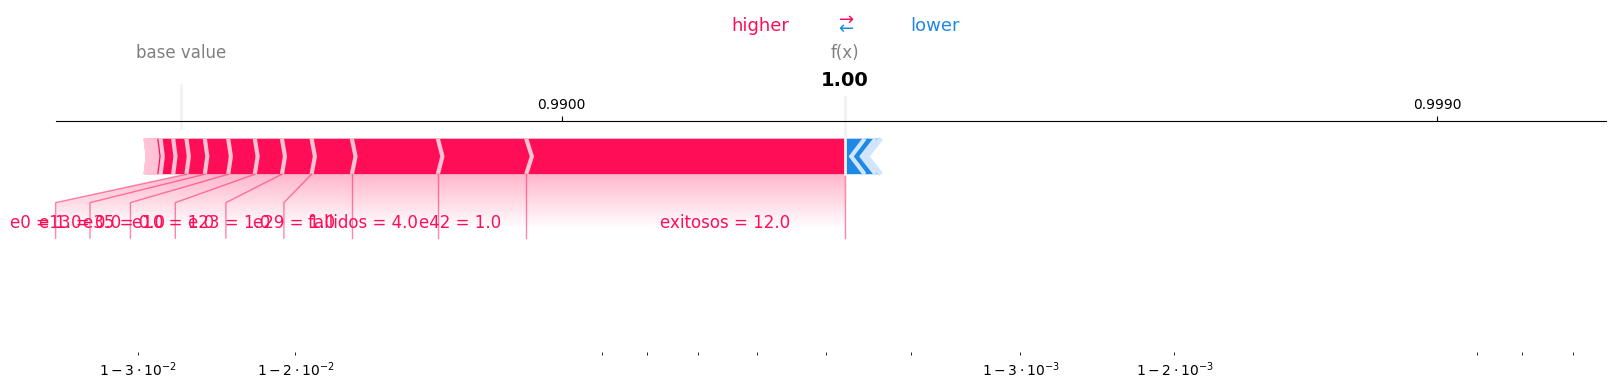

In [51]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], link='logit', matplotlib=True)

In [52]:
shap.force_plot(explainer.expected_value, shap_values, X_test, link='logit')


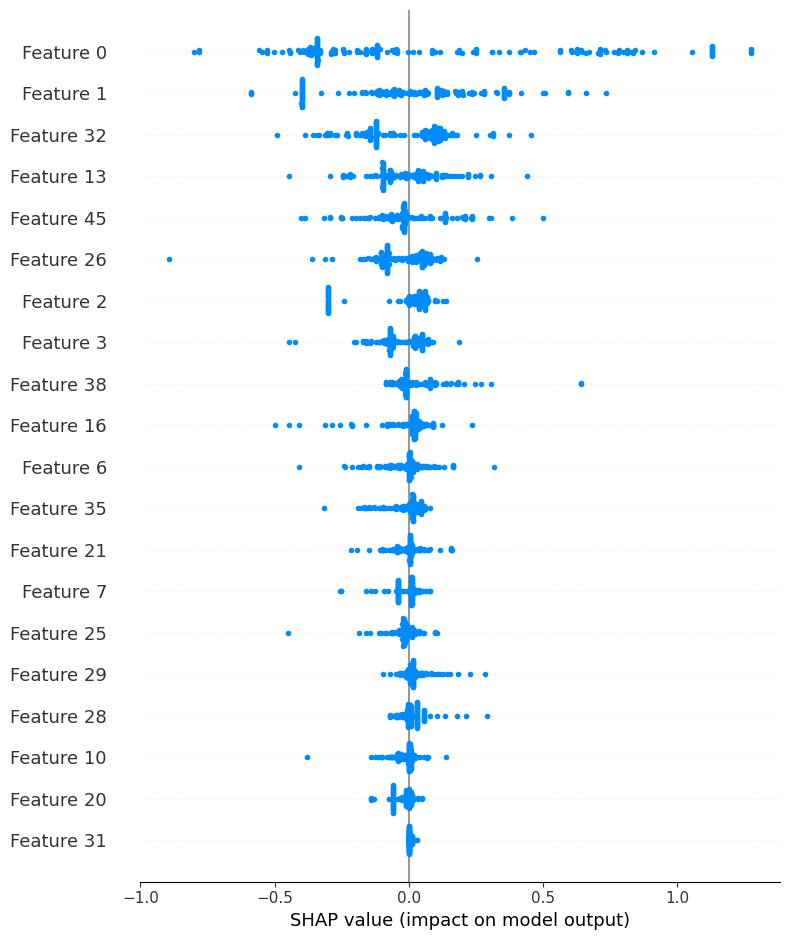

In [46]:
shap.summary_plot(shap_values)

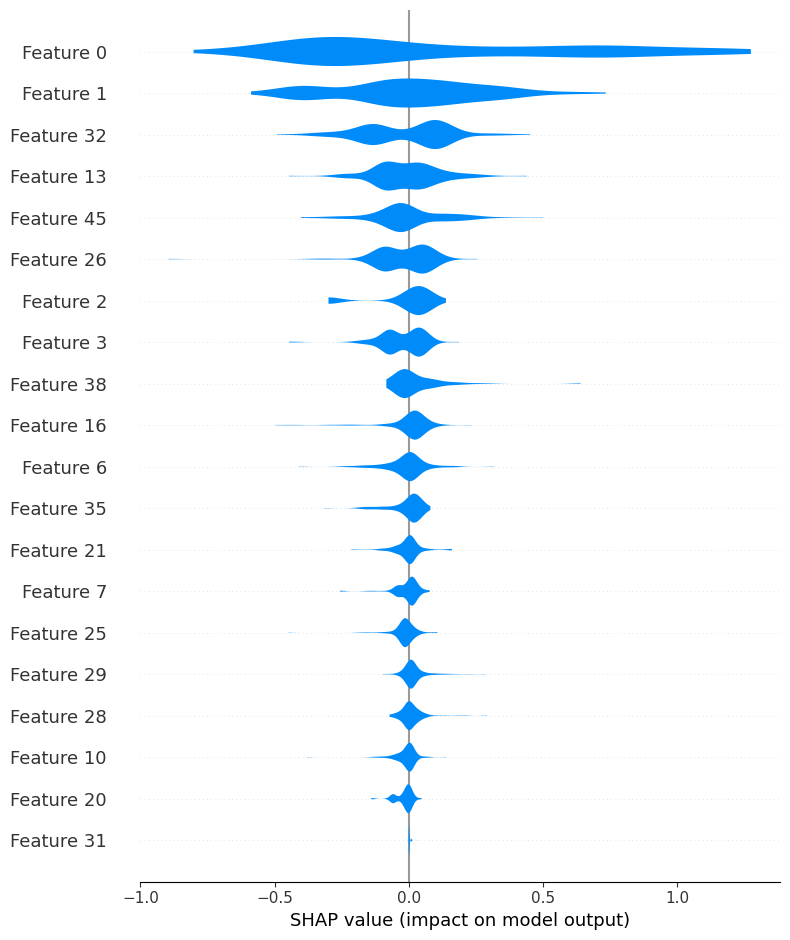

In [47]:
shap.summary_plot(shap_values, plot_type='violin')